<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week10/Week10_CART_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Pseudocode for regression tree
```
FUNCTION BUILD_REGRESSION_TREE(X, y, max_depth, min_samples_split, depth=0)
    IF (depth >= max_depth) OR (number of samples in y < min_samples_split)
        RETURN LEAF_NODE with prediction = MEAN(y)

    best_feature ← NONE
    best_threshold ← NONE
    best_error ← INFINITY

    FOR each feature_index from 1 to number_of_features in X:
        thresholds ← UNIQUE_VALUES(X[:, feature_index])
        FOR each threshold IN thresholds:
            left_indices ← indices where X[:, feature_index] <= threshold
            right_indices ← indices where X[:, feature_index] > threshold

            IF (left_indices is empty) OR (right_indices is empty)
                CONTINUE to next threshold

            error_left ← MSE(y[left_indices])      // MSE = (1/N_left)*Σ (y_i - MEAN(y_left))^2
            error_right ← MSE(y[right_indices])    // MSE = (1/N_right)*Σ (y_i - MEAN(y_right))^2

            total_error ← (number of left_indices * error_left) + (number of right_indices * error_right)

            IF total_error < best_error THEN
                best_error ← total_error
                best_feature ← feature_index
                best_threshold ← threshold
            END IF
        END FOR
    END FOR

    IF best_feature is NONE
        RETURN LEAF_NODE with prediction = MEAN(y)

    left_indices ← indices where X[:, best_feature] <= best_threshold
    right_indices ← indices where X[:, best_feature] > best_threshold

    left_tree ← BUILD_REGRESSION_TREE(X[left_indices], y[left_indices], max_depth, min_samples_split, depth + 1)
    right_tree ← BUILD_REGRESSION_TREE(X[right_indices], y[right_indices], max_depth, min_samples_split, depth + 1)

    RETURN NODE with:
        - feature = best_feature
        - threshold = best_threshold
        - left = left_tree
        - right = right_tree
END FUNCTION

FUNCTION PREDICT_REGRESSION(tree, sample)
    IF tree is a LEAF_NODE THEN
        RETURN tree.prediction
    ELSE IF sample[tree.feature] <= tree.threshold THEN
        RETURN PREDICT_REGRESSION(tree.left, sample)
    ELSE
        RETURN PREDICT_REGRESSION(tree.right, sample)
    END IF
END FUNCTION
```

In [2]:
import numpy as np

# Calculate mean squared error (MSE) for a set of target values
def mse(y):
    if len(y) == 0:
        return 0
    return np.mean((y - np.mean(y))**2)

# Find the best split for the data
def best_split(X, y):
    best_feature, best_threshold, best_error = None, None, float('inf')
    n_samples, n_features = X.shape

    # Iterate over each feature
    for feature in range(n_features):
        # Consider sorted unique values for thresholds
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            # Split the data
            left_indices = X[:, feature] <= threshold
            right_indices = X[:, feature] > threshold
            if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                continue  # Skip invalid splits

            # Compute the MSE for left and right nodes
            error_left = mse(y[left_indices])
            error_right = mse(y[right_indices])
            total_error = error_left * np.sum(left_indices) + error_right * np.sum(right_indices)

            # Update best split if total_error is lower
            if total_error < best_error:
                best_error = total_error
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold, best_error

# Recursively build the regression tree
def build_tree(X, y, max_depth=3, min_samples_split=2, depth=0):
    # Stop splitting if maximum depth is reached or there are too few samples
    if depth >= max_depth or len(y) < min_samples_split:
        return {'prediction': np.mean(y)}

    feature, threshold, error = best_split(X, y)

    # If no valid split is found, return leaf node
    if feature is None:
        return {'prediction': np.mean(y)}

    # Partition the data into left and right nodes
    left_indices = X[:, feature] <= threshold
    right_indices = X[:, feature] > threshold

    # Build subtrees recursively
    left_tree = build_tree(X[left_indices], y[left_indices], max_depth, min_samples_split, depth + 1)
    right_tree = build_tree(X[right_indices], y[right_indices], max_depth, min_samples_split, depth + 1)

    # Return the current node as a dictionary
    return {
        'feature': feature,
        'threshold': threshold,
        'left': left_tree,
        'right': right_tree
    }

# Function to make predictions with the functional tree
def predict_tree(tree, x):
    # If the node is a leaf, return its prediction
    if 'prediction' in tree:
        return tree['prediction']
    # Otherwise, decide which branch to follow based on the feature and threshold
    if x[tree['feature']] <= tree['threshold']:
        return predict_tree(tree['left'], x)
    else:
        return predict_tree(tree['right'], x)




In [15]:
# For regression, we use a dataset for BMI calculation.
# BMI = weight / (height^2)
# We include weight, height and gender (0: F, 1: M). For simplicity, we use only Weight (column 0) for splitting.
X_reg = np.array([
    [60, 1.60, 0],  # Female
    [70, 1.70, 1],  # Male
    [80, 1.80, 1],  # Male
    [55, 1.55, 0],  # Female
    [65, 1.65, 0],  # Female
    [85, 1.75, 1]   # Male
])
# Compute BMI for each sample.
y_reg = np.array([60/(1.60**2), 70/(1.70**2), 80/(1.80**2), 55/(1.55**2), 65/(1.65**2), 85/(1.75**2)])


In [16]:
# # Create a simple dataset
# X = np.array([[1], [2], [3], [4], [5], [6]])
# y = np.array([1.2, 1.9, 3.0, 3.9, 5.1, 6.0])

# Build the tree
tree = build_tree(X = X_reg, y = y_reg, max_depth=3, min_samples_split=2)
print("Functional Tree Structure:")
print(tree)

# Predict a new value
x_new = np.array([55, 1.45, 0])
prediction = predict_tree(tree, x_new)
print(f"Prediction for {x_new}: {prediction}")

Functional Tree Structure:
{'feature': 0, 'threshold': np.float64(55.0), 'left': {'prediction': np.float64(22.892819979188342)}, 'right': {'feature': 0, 'threshold': np.float64(60.0), 'left': {'prediction': np.float64(23.437499999999996)}, 'right': {'feature': 0, 'threshold': np.float64(65.0), 'left': {'prediction': np.float64(23.875114784205696)}, 'right': {'prediction': np.float64(24.221453287197235)}}}}
Prediction for [55.    1.45  0.  ]: 22.892819979188342


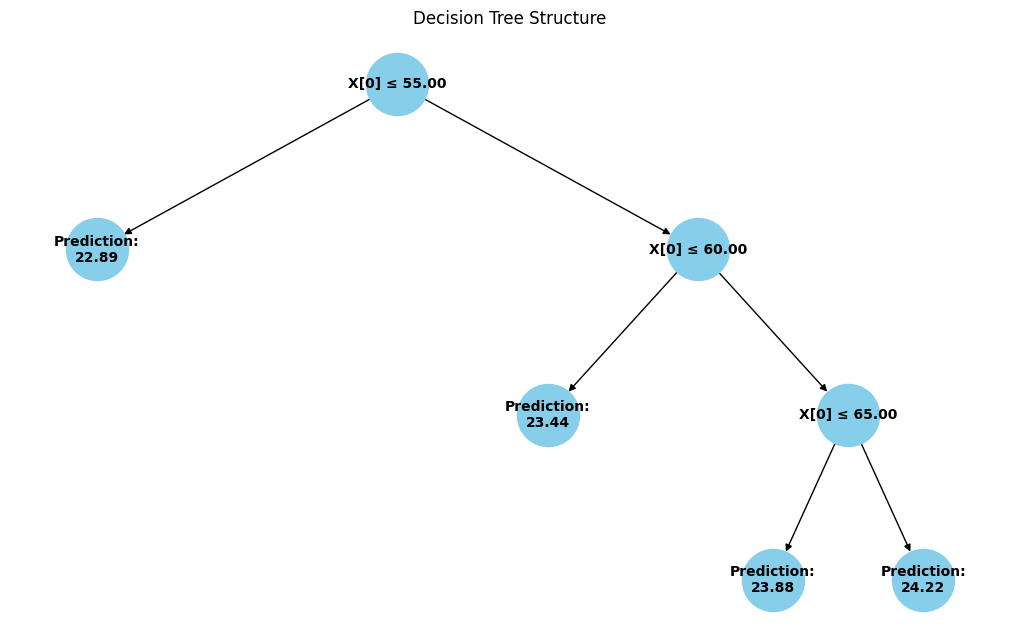

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def get_label(node):
    """
    Returns a label for the node.
    For internal nodes, shows the feature and threshold.
    For leaf nodes, shows the prediction.
    """
    if "prediction" in node:
        return f"Prediction:\n{node['prediction']:.2f}"
    else:
        return f"X[{node['feature']}] ≤ {node['threshold']:.2f}"

def add_nodes_edges(tree, G, pos, parent=None, x=0, y=0, x_offset=2.0):
    """
    Recursively adds nodes and edges to the graph G from the tree.
    The node positions are stored in the pos dictionary.
    """
    node_id = len(G.nodes)
    label = get_label(tree)
    G.add_node(node_id, label=label)
    pos[node_id] = (x, y)

    if parent is not None:
        G.add_edge(parent, node_id)

    # If it's a leaf node, nothing to add.
    if "prediction" in tree:
        return

    # Recurse for left and right children.
    # Left child: shift to the left; right child: shift to the right.
    add_nodes_edges(tree["left"], G, pos, parent=node_id, x=x - x_offset, y=y - 1, x_offset=x_offset/2)
    add_nodes_edges(tree["right"], G, pos, parent=node_id, x=x + x_offset, y=y - 1, x_offset=x_offset/2)

def plot_tree_matplotlib(tree):
    """
    Given a tree (in nested dictionary format), build and plot the tree using NetworkX and Matplotlib.
    """
    G = nx.DiGraph()
    pos = {}
    add_nodes_edges(tree, G, pos, x=0, y=0, x_offset=2.0)

    # Extract the node labels
    labels = nx.get_node_attributes(G, 'label')

    # Plot the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=2000,
            node_color="skyblue", font_size=10, font_weight="bold", arrows=True)
    plt.title("Decision Tree Structure")
    plt.axis("off")
    plt.show()


# Plot the example tree:
plot_tree_matplotlib(tree)


#### Pseudocode for classification tree

```
FUNCTION BUILD_CLASSIFICATION_TREE(X, y, criterion, max_depth, min_samples_split, depth=0)
    IF (depth >= max_depth) OR (number of samples in y < min_samples_split)
        RETURN LEAF_NODE with prediction = MAJORITY_CLASS(y)

    best_feature ← NONE
    best_threshold ← NONE
    best_impurity ← INFINITY

    FOR each feature_index from 1 to number_of_features in X:
        thresholds ← UNIQUE_VALUES(X[:, feature_index])
        FOR each threshold IN thresholds:
            left_indices ← indices where X[:, feature_index] <= threshold
            right_indices ← indices where X[:, feature_index] > threshold

            IF (left_indices is empty) OR (right_indices is empty)
                CONTINUE to next threshold

            impurity_left ← COMPUTE_IMPURITY(y[left_indices], criterion)
            impurity_right ← COMPUTE_IMPURITY(y[right_indices], criterion)
            // Weighted impurity: weighted sum of impurities of left and right subsets.
            weighted_impurity ← (number of left_indices / total_samples) * impurity_left
                                + (number of right_indices / total_samples) * impurity_right

            IF weighted_impurity < best_impurity THEN
                best_impurity ← weighted_impurity
                best_feature ← feature_index
                best_threshold ← threshold
            END IF
        END FOR
    END FOR

    IF best_feature is NONE
        RETURN LEAF_NODE with prediction = MAJORITY_CLASS(y)

    left_indices ← indices where X[:, best_feature] <= best_threshold
    right_indices ← indices where X[:, best_feature] > best_threshold

    left_tree ← BUILD_CLASSIFICATION_TREE(X[left_indices], y[left_indices], criterion, max_depth, min_samples_split, depth + 1)
    right_tree ← BUILD_CLASSIFICATION_TREE(X[right_indices], y[right_indices], criterion, max_depth, min_samples_split, depth + 1)

    RETURN NODE with:
        - feature = best_feature
        - threshold = best_threshold
        - left = left_tree
        - right = right_tree
END FUNCTION

FUNCTION COMPUTE_IMPURITY(y, criterion)
    // Let p_k be the fraction of samples in y that belong to class k.
    IF criterion is "gini" THEN
        RETURN 1 - SUM over all classes (p_k)^2
    ELSE IF criterion is "entropy" THEN
        RETURN - SUM over all classes (p_k * log2(p_k))   // Handle p_k = 0 appropriately.
    END IF
END FUNCTION

FUNCTION PREDICT_CLASSIFICATION(tree, sample)
    IF tree is a LEAF_NODE THEN
        RETURN tree.prediction
    ELSE IF sample[tree.feature] <= tree.threshold THEN
        RETURN PREDICT_CLASSIFICATION(tree.left, sample)
    ELSE
        RETURN PREDICT_CLASSIFICATION(tree.right, sample)
    END IF
END FUNCTION

```

In [6]:
import numpy as np

# Compute the impurity for a set of class labels using the specified criterion.
def compute_impurity(y, criterion='gini'):
    # Count the occurrences of each class.
    classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / counts.sum()

    if criterion == 'gini':
        # Gini impurity: 1 - sum(p_k^2)
        impurity = 1 - np.sum(probabilities ** 2)
    elif criterion == 'entropy':
        # Entropy: - sum(p_k * log2(p_k))
        # Use np.where to avoid log2(0)
        impurity = -np.sum(probabilities * np.where(probabilities > 0, np.log2(probabilities), 0))
    else:
        raise ValueError("Criterion must be 'gini' or 'entropy'")
    return impurity

# Find the best split for the data given a criterion.
def best_split(X, y, criterion='gini'):
    best_feature, best_threshold = None, None
    best_impurity = float('inf')
    n_samples, n_features = X.shape

    # Iterate over each feature.
    for feature in range(n_features):
        thresholds = np.unique(X[:, feature])
        for threshold in thresholds:
            left_indices = X[:, feature] <= threshold
            right_indices = X[:, feature] > threshold

            # Skip splits that do not divide the data.
            if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
                continue

            # Compute impurities for left and right subsets.
            impurity_left = compute_impurity(y[left_indices], criterion)
            impurity_right = compute_impurity(y[right_indices], criterion)
            # Weighted impurity.
            weighted_impurity = (np.sum(left_indices) / n_samples) * impurity_left + \
                                (np.sum(right_indices) / n_samples) * impurity_right

            # Update best split if we find a lower weighted impurity.
            if weighted_impurity < best_impurity:
                best_impurity = weighted_impurity
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold, best_impurity

# Recursively build the classification tree.
def build_tree(X, y, criterion='gini', max_depth=3, min_samples_split=2, depth=0):
    # Stop if maximum depth is reached or too few samples.
    if depth >= max_depth or len(y) < min_samples_split:
        # At leaf: assign the majority class.
        classes, counts = np.unique(y, return_counts=True)
        return {'prediction': classes[np.argmax(counts)]}

    feature, threshold, impurity = best_split(X, y, criterion)

    # If no valid split is found, return a leaf node.
    if feature is None:
        classes, counts = np.unique(y, return_counts=True)
        return {'prediction': classes[np.argmax(counts)]}

    left_indices = X[:, feature] <= threshold
    right_indices = X[:, feature] > threshold

    left_tree = build_tree(X[left_indices], y[left_indices], criterion, max_depth, min_samples_split, depth + 1)
    right_tree = build_tree(X[right_indices], y[right_indices], criterion, max_depth, min_samples_split, depth + 1)

    return {
        'feature': feature,
        'threshold': threshold,
        'left': left_tree,
        'right': right_tree
    }

# Function to make predictions with the functional tree.
def predict_tree(tree, x):
    if 'prediction' in tree:
        return tree['prediction']
    if x[tree['feature']] <= tree['threshold']:
        return predict_tree(tree['left'], x)
    else:
        return predict_tree(tree['right'], x)



In [14]:
# For classification, we use a small dataset with Age and Diabetes (0: No, 1: Yes).
# Here, we use only the Age feature for simplicity.
# Data: [Age, Gender] but we will use only Age for splitting.
X_class = np.array([
    [30, 0],  # Age 30, F
    [40, 0],  # Age 40, F
    [25, 1],  # Age 25, M
    [50, 1],  # Age 50, M
    [35, 0],  # Age 35, F
    [45, 1]   # Age 45, M
])
y_class = np.array([0, 1, 0, 1, 0, 1])  # 0: No, 1: Yes

In [11]:
# # Create a simple dataset.
# # Features: a single feature for simplicity.
# X = np.array([[2], [3], [10], [19], [21], [22]])
# # Class labels: 0 or 1.
# y = np.array([0, 0, 1, 1, 1, 1])

# Build the tree using Gini impurity.
tree_gini = build_tree(X = X_class, y = y_class, criterion='gini', max_depth=3, min_samples_split=2)
print("Functional Tree Structure (Gini):")
print(tree_gini)

# Predict for a new sample.
x_new = np.array([40, 1])
prediction = predict_tree(tree_gini, x_new)
print(f"Prediction for {x_new} (Gini): {prediction}")

# Build the tree using Entropy.
tree_entropy = build_tree(X = X_class, y = y_class, criterion='entropy', max_depth=3, min_samples_split=2)
print("\nFunctional Tree Structure (Entropy):")
print(tree_entropy)

# Predict for the same sample.
prediction_entropy = predict_tree(tree_entropy, x_new)
print(f"Prediction for {x_new} (Entropy): {prediction_entropy}")

Functional Tree Structure (Gini):
{'feature': 0, 'threshold': np.int64(35), 'left': {'feature': 0, 'threshold': np.int64(25), 'left': {'prediction': np.int64(0)}, 'right': {'feature': 0, 'threshold': np.int64(30), 'left': {'prediction': np.int64(0)}, 'right': {'prediction': np.int64(0)}}}, 'right': {'feature': 0, 'threshold': np.int64(40), 'left': {'prediction': np.int64(1)}, 'right': {'feature': 0, 'threshold': np.int64(45), 'left': {'prediction': np.int64(1)}, 'right': {'prediction': np.int64(1)}}}}
Prediction for [40  1] (Gini): 1

Functional Tree Structure (Entropy):
{'feature': 0, 'threshold': np.int64(35), 'left': {'feature': 0, 'threshold': np.int64(25), 'left': {'prediction': np.int64(0)}, 'right': {'feature': 0, 'threshold': np.int64(30), 'left': {'prediction': np.int64(0)}, 'right': {'prediction': np.int64(0)}}}, 'right': {'feature': 0, 'threshold': np.int64(40), 'left': {'prediction': np.int64(1)}, 'right': {'feature': 0, 'threshold': np.int64(45), 'left': {'prediction': np.

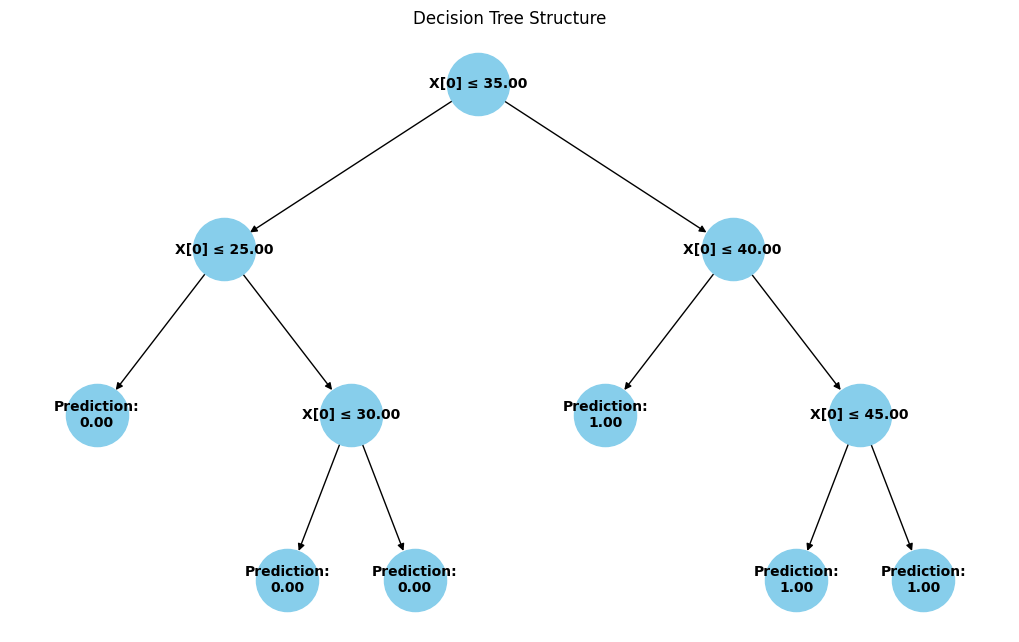

In [18]:
plot_tree_matplotlib(tree_gini)